In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
torch.manual_seed(1)

In [5]:
import torch
from torchvision import datasets, transforms
import numpy as np

def load_data(train_batch_size, test_batch_size):
    # Fetch training data: total 60000 samples
    
    # Define transformations separately
    train_transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    test_transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Load the datasets using MNIST, downloading it only if not available
    trainset = datasets.MNIST(root='data', train=True, download=True, transform=train_transform)
    
    # Replace original targets with random integers between 0 and 9 (inclusive)
    random_targets = torch.randint(0, 10, (len(trainset),), dtype=torch.long)
    trainset.targets = random_targets
    
    # Create a DataLoader for the training dataset
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)
    
    # Load the test set with test transformations
    testset = datasets.MNIST(root='data', train=False, download=True, transform=test_transform)
    
    # Create a DataLoader for the test dataset
    test_loader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)
    
    return (train_loader, test_loader)


In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
    
        # Flatten the tensor
        x = x.flatten(start_dim=1)
    
        # Apply fully connected layers with ReLU activations
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
    
        # Apply final fully connected layer without activation
        x = self.fc3(x)
        return x


In [7]:
train_batch_size = 10
test_batch_size = 10
train_loader, test_loader = load_data(train_batch_size, test_batch_size)

In [8]:
def train(model, optimizer, train_loader):
    model.train()
    correct = 0
    train_loss = 0
    counter = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        counter += 1
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        pred = np.argmax(output.data, axis=1)
        correct += np.equal(pred, target.data).sum()
    
    train_loss = (train_loss * 100) / len(train_loader.dataset)
    acc = 100.0 * correct / len(train_loader.dataset)
    return train_loss, acc

In [9]:
def test(model, epoch, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        
        output = model(data)
        loss = loss_fn(output, target)
        test_loss += loss.data

        pred = np.argmax(output.data, axis = 1)
        correct = correct + np.equal(pred, target.data).sum()

    # Print log
        avg_loss = test_loss / len(test_loader.dataset)  # Calculate average loss directly
    accuracy = 100.0 * correct / len(test_loader.dataset)  # Compute accuracy percentage

    print(f'\nTest set, Epoch {epoch}, Average loss: {avg_loss:.4f}, '
          f'Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')

    return avg_loss


In [10]:
model = CNN()

optimizer = optim.Adam(model.parameters(), lr=0.0001)
m1_train_loss_arr = []
m1_test_loss_arr = []

epochs = 20
log_interval = 500
loss_fn = torch.nn.CrossEntropyLoss()
for epoch in range(1, epochs + 1):
    # Training phase
    tr_loss, acc = train(model, optimizer, train_loader)
    m1_train_loss_arr.append(tr_loss)
    loss_test = test(model, epoch, test_loader)
    m1_test_loss_arr.append(loss_test)
    print(f'Epoch {epoch}: Training Loss = {tr_loss:.4f}, Test Loss = {loss_test:.4f}')



Test set, Epoch 1, Average loss: 0.2304, Accuracy: 627/10000 (6%)

Epoch 1: Training Loss = 23.0341, Test Loss = 0.2304

Test set, Epoch 2, Average loss: 0.2303, Accuracy: 864/10000 (9%)

Epoch 2: Training Loss = 23.0252, Test Loss = 0.2303

Test set, Epoch 3, Average loss: 0.2303, Accuracy: 1788/10000 (18%)

Epoch 3: Training Loss = 23.0173, Test Loss = 0.2303

Test set, Epoch 4, Average loss: 0.2298, Accuracy: 1122/10000 (11%)

Epoch 4: Training Loss = 23.0067, Test Loss = 0.2298

Test set, Epoch 5, Average loss: 0.2309, Accuracy: 1198/10000 (12%)

Epoch 5: Training Loss = 22.9915, Test Loss = 0.2309

Test set, Epoch 6, Average loss: 0.2305, Accuracy: 1043/10000 (10%)

Epoch 6: Training Loss = 22.9678, Test Loss = 0.2305

Test set, Epoch 7, Average loss: 0.2303, Accuracy: 1165/10000 (12%)

Epoch 7: Training Loss = 22.9374, Test Loss = 0.2303

Test set, Epoch 8, Average loss: 0.2313, Accuracy: 976/10000 (10%)

Epoch 8: Training Loss = 22.9007, Test Loss = 0.2313

Test set, Epoch 9, A

In [13]:
temp_1 = []
for i in m1_train_loss_arr:
    temp_1.append(i.data.numpy().tolist())
temp_2 = []
for i in m1_test_loss_arr:
    temp_2.append(i.data.numpy().tolist())

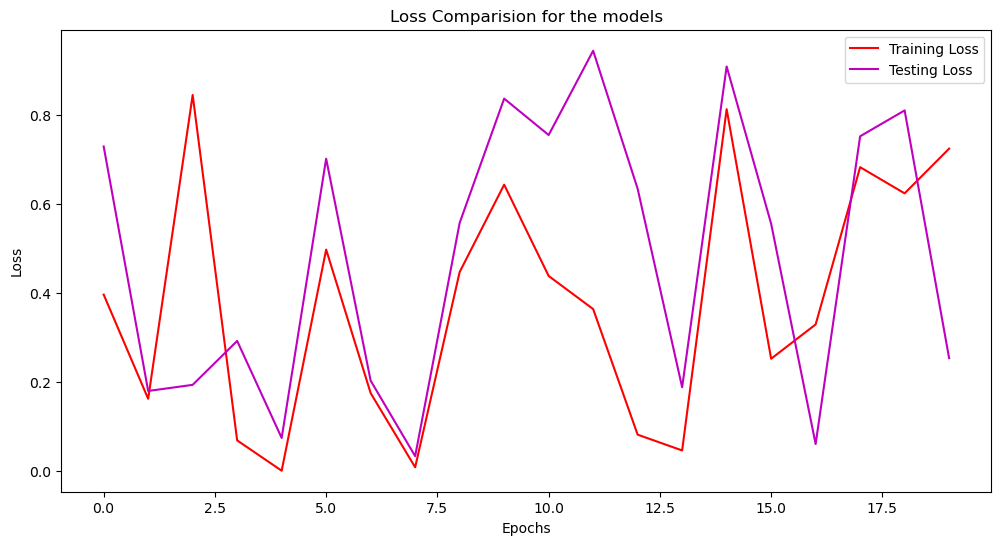

In [21]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 20, 1), temp_1, color = "r")
plt.plot(np.arange(0, 20, 1), temp_2, color = "m")
plt.title('Loss Comparision for the models')
plt.legend(['Training Loss', 'Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()